
# Kahekihiline närvivõrk — üks neuron mõlemas kihis

Siin vaatame kolme varianti, kus **iga kiht sisaldab ainult ühte neuronit**.  
Eesmärk on näha, kuidas **aktivatsioonifunktsioon** muudab mudeli käitumist ja väljundi kuju.

| Mudel | Aktivatsioonid | Tulemus | Märkus |
|--------|----------------|----------|---------|
| Linear → Linear | Sirgjoon | Puhas lineaarne seos |
| ReLU → Linear | Tükiline sirgjoon | Tekib murdepunkt |
| Sigmoid → Linear | S-kujuline kõver | Mittelineaarne üleminek |


2025-10-11 10:37:02.753386: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-11 10:37:04.291806: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-11 10:37:06.704356: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


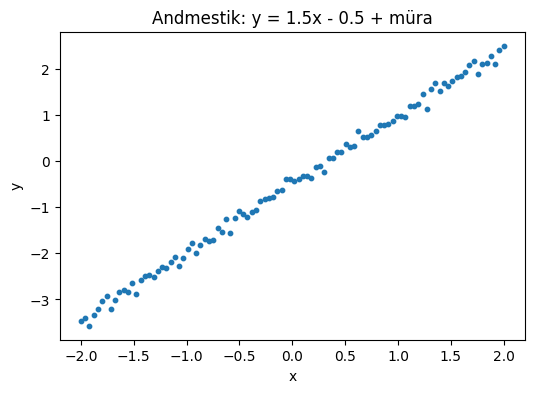

In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

# Andmestik: lihtne lineaarne funktsioon väikse müraga
x = np.linspace(-2, 2, 100)
y = 1.5 * x - 0.5 + np.random.randn(*x.shape) * 0.1

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=10)
plt.title("Andmestik: y = 1.5x - 0.5 + müra")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7ffa28d7bf60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


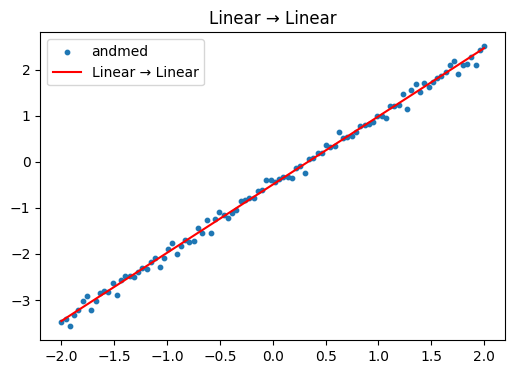

hidden weights: [array([[-1.2047591]], dtype=float32), array([0.24399221], dtype=float32)]
output weights: [array([[-1.228658]], dtype=float32), array([-0.19702725], dtype=float32)]


In [4]:

model_lin = Sequential([
    Input(shape=(1,)),
    Dense(1, activation='linear', name='hidden'),
    Dense(1, activation='linear', name='output')
])

model_lin.compile(optimizer='sgd', loss='mse')
model_lin.fit(x, y, epochs=300, verbose=0)

y_pred_lin = model_lin.predict(x)

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=10, label='andmed')
plt.plot(x, y_pred_lin, 'r', label='Linear → Linear')
plt.title("Linear → Linear")
plt.legend()
plt.show()

for layer in model_lin.layers:
    print(f"{layer.name} weights:", layer.get_weights())


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


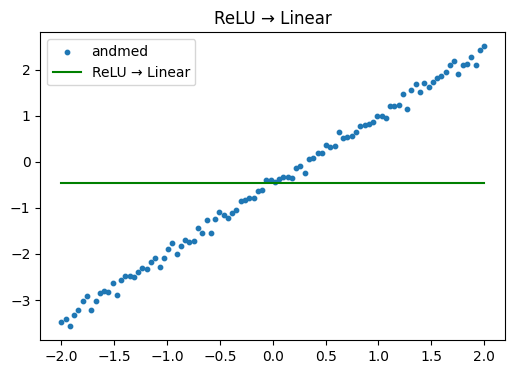

hidden_relu weights: [array([[0.3534274]], dtype=float32), array([-0.7096006], dtype=float32)]
output weights: [array([[-0.8640878]], dtype=float32), array([-0.4653368], dtype=float32)]


In [5]:

model_relu = Sequential([
    Input(shape=(1,)),
    Dense(1, activation='relu', name='hidden_relu'),
    Dense(1, activation='linear', name='output')
])

model_relu.compile(optimizer='adam', loss='mse')
model_relu.fit(x, y, epochs=500, verbose=0)

y_pred_relu = model_relu.predict(x)

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=10, label='andmed')
plt.plot(x, y_pred_relu, 'g', label='ReLU → Linear')
plt.title("ReLU → Linear")
plt.legend()
plt.show()

for layer in model_relu.layers:
    print(f"{layer.name} weights:", layer.get_weights())


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


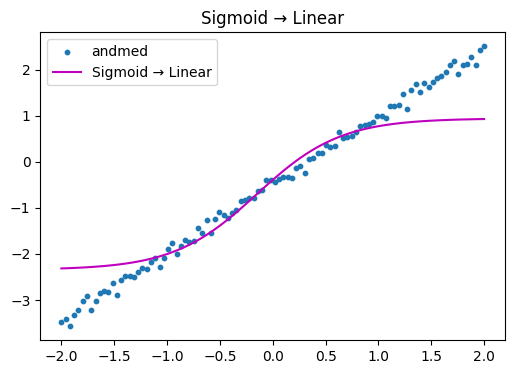

hidden_sigmoid weights: [array([[-2.5316677]], dtype=float32), array([-0.379261], dtype=float32)]
output weights: [array([[-3.2858677]], dtype=float32), array([0.9399772], dtype=float32)]


In [6]:

model_sig = Sequential([
    Input(shape=(1,)),
    Dense(1, activation='sigmoid', name='hidden_sigmoid'),
    Dense(1, activation='linear', name='output')
])

model_sig.compile(optimizer='adam', loss='mse')
model_sig.fit(x, y, epochs=1000, verbose=0)

y_pred_sig = model_sig.predict(x)

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=10, label='andmed')
plt.plot(x, y_pred_sig, 'm', label='Sigmoid → Linear')
plt.title("Sigmoid → Linear")
plt.legend()
plt.show()

for layer in model_sig.layers:
    print(f"{layer.name} weights:", layer.get_weights())



# 🧩 Kokkuvõte

| Mudel | Aktivatsioonid | Kuju | Tüüp |
|--------|----------------|------|------|
| Linear → Linear | Sirge joon | Lineaarne |
| ReLU → Linear | Tükiline sirge | Mittelineaarne (ReLU lõikus) |
| Sigmoid → Linear | S-kuju | Pehme mittelineaarsus |

➡ Väga väike võrk võib käituda väga erinevalt —  
kõik sõltub **aktivatsioonifunktsioonist**, mitte ainult kihtide arvust.
